# 鐵達尼號 生存預測
## 根據鐵達尼號上的乘客資料來訓練機器，來預測某人若在鐵達尼號上是否生存

In [1]:
import seaborn as sns
import pandas as pd

匯入資料集

In [2]:
df = sns.load_dataset('titanic')
df.head(10)  #確認數據

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
df.isnull().sum()  確認有無空值

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.isnull().sum().sum()

869

In [5]:
df[pd.isnull(df.embark_town)] #確認embark_town空值項目

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [6]:
df.loc[[61-1, 829-1]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
828,1,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True


In [7]:
df.embark_town.fillna(method='ffill', inplace=True) # 將embark_town空值項目用前面一項填入

In [8]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [9]:
df.age.fillna(df.age.median(), inplace=True) #將age空值項目用中位數填入

In [10]:
df.drop('deck', axis=1, inplace=True) #將deck項目捨棄 空值過多

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [12]:
df.embarked.fillna(method='ffill', inplace=True) #將embarked空值項目用前面一項填入

In [13]:
df.sex.unique() # 確認性別 種類

array(['male', 'female'], dtype=object)

In [14]:
df.sex = df.sex.map({'male':1, 'female':0}) #將sex 文字改數字
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [15]:
df.info()  #確認各個欄位的資料型態  主要想將資料皆改為數字型態

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(5), object(4)
memory usage: 79.4+ KB


In [16]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [17]:
df.embark_town = df.embark_town.map({'Southampton':0, 'Cherbourg':1, 'Queenstown':2})
df.embarked = df.embarked.map({'S':0, 'C':1, 'Q':2})          #將embark_town和embarked 改為數字型態

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,0,Third,man,True,0,no,False
1,1,1,0,38.0,1,0,71.2833,1,First,woman,False,1,yes,False
2,1,3,0,26.0,0,0,7.9250,0,Third,woman,False,0,yes,True
3,1,1,0,35.0,1,0,53.1000,0,First,woman,False,0,yes,False
4,0,3,1,35.0,0,0,8.0500,0,Third,man,True,0,no,True


In [18]:
df.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [19]:
df.who = df.who.map({'man':0, 'woman':1, 'child':2}) #將 who 改為數字型態
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,0,Third,0,True,0,no,False
1,1,1,0,38.0,1,0,71.2833,1,First,1,False,1,yes,False
2,1,3,0,26.0,0,0,7.9250,0,Third,1,False,0,yes,True
3,1,1,0,35.0,1,0,53.1000,0,First,1,False,0,yes,False
4,0,3,1,35.0,0,0,8.0500,0,Third,0,True,0,no,True


In [20]:
df['class'].unique() 

[Third, First, Second]
Categories (3, object): [Third, First, Second]

In [21]:
df['class'] = df['class'].map({'First':1, 'Second':2, 'Third':3})
df['alive'] = df['alive'].map({'no':0, 'yes':1})            #將 class和 alive 改為數字型態
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,0,3,0,True,0,0,False
1,1,1,0,38.0,1,0,71.2833,1,1,1,False,1,1,False
2,1,3,0,26.0,0,0,7.9250,0,3,1,False,0,1,True
3,1,1,0,35.0,1,0,53.1000,0,1,1,False,0,1,False
4,0,3,1,35.0,0,0,8.0500,0,3,0,True,0,0,True


In [22]:
df.drop('embarked', axis=1, inplace=True)  #將embarked 捨棄 (因embarked和embark_town只要留下一個就好)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,3,0,True,0,0,False
1,1,1,0,38.0,1,0,71.2833,1,1,False,1,1,False
2,1,3,0,26.0,0,0,7.9250,3,1,False,0,1,True
3,1,1,0,35.0,1,0,53.1000,1,1,False,0,1,False
4,0,3,1,35.0,0,0,8.0500,3,0,True,0,0,True


In [23]:
df['class'] = df['class'].astype(int) #將class 改為數字型態

In [24]:
df.info()  #確認資料是否皆為數字型態

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   class        891 non-null    int32  
 8   who          891 non-null    int64  
 9   adult_male   891 non-null    bool   
 10  embark_town  891 non-null    int64  
 11  alive        891 non-null    int64  
 12  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(8)
memory usage: 75.0 KB


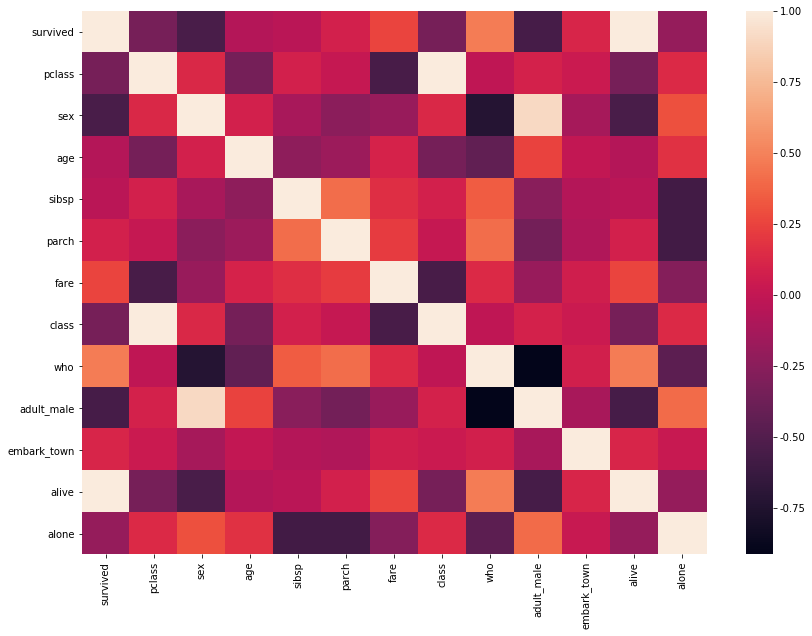

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(df.corr())   #確認生存與否 和各項目關係

In [26]:
df.adult_male = df.adult_male.astype(int)
df.alone = df.alone.astype(int)             #將adult_male和alone 改為數字型態


In [27]:
df.info()   #再次確認資料是否皆為數字型態

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   class        891 non-null    int32  
 8   who          891 non-null    int64  
 9   adult_male   891 non-null    int32  
 10  embark_town  891 non-null    int64  
 11  alive        891 non-null    int64  
 12  alone        891 non-null    int32  
dtypes: float64(2), int32(3), int64(8)
memory usage: 80.2 KB


In [28]:
# sns.pairplot(df)

In [29]:
df.drop(['class', 'alive', 'who', 'alone'], axis=1, inplace=True) #將多於項目清理
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,1,22.0,1,0,7.2500,1,0
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,0
4,0,3,1,35.0,0,0,8.0500,1,0


## 額外學習 (新增某一欄位 其值和原有欄位值相關)

In [30]:
df['xxx'] = (df['sex'] == 1) & (df['age'] >= 18)  

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,xxx
0,0,3,1,22.0,1,0,7.2500,1,0,True
1,1,1,0,38.0,1,0,71.2833,0,1,False
2,1,3,0,26.0,0,0,7.9250,0,0,False
3,1,1,0,35.0,1,0,53.1000,0,0,False
4,0,3,1,35.0,0,0,8.0500,1,0,True


In [32]:
del df['xxx']

## 額外學習cut  ， 可用來判別數值區間
https://medium.com/@morris_tai/pandas%E7%9A%84cut-qcut%E5%87%BD%E6%95%B8-93c244e34cfc

In [33]:
aages = [5, 20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32, 101]

In [44]:
bins = [0, 18, 25, 35, 60, 100]
cats = pd.cut(aages, bins)
cats

[(0, 18], (18, 25], (18, 25], (18, 25], (25, 35], ..., (60.0, 100.0], (35.0, 60.0], (35.0, 60.0], (25.0, 35.0], NaN]
Length: 14
Categories (5, interval[int64]): [(0, 18] < (18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [45]:
type(cats[0]) #確認型態

pandas._libs.interval.Interval

In [37]:
# Titanic
bins = [0, 15, 25, 35, 60, 100]
score_cut = pd.cut(df['age'], bins, labels=[0, 4, 3, 2, 1])
score_cut

0      4
1      2
2      3
3      3
4      3
      ..
886    3
887    4
888    3
889    3
890    3
Name: age, Length: 891, dtype: category
Categories (5, int64): [0 < 4 < 3 < 2 < 1]

## 利用CUT 我們將年齡做一個評比
### 0~15 其年齡較無生存能力所以將其改為0分
### 15~25 歲其體力最好 較易生存 故評為4分
### 隨著年齡增加評比遞減

In [42]:
df['age'] = pd.cut(df['age'], bins, labels=[0, 4, 3, 2, 1]) 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,1,4,1,0,7.2500,1,0
1,1,1,0,2,1,0,71.2833,0,1
2,1,3,0,3,0,0,7.9250,0,0
3,1,1,0,3,1,0,53.1000,0,0
4,0,3,1,3,0,0,8.0500,1,0


In [43]:
y = df['survived']
X = df.drop('survived', axis=1)  #有無獲救和有無生存為一樣的意思 故去除

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
from sklearn.preprocessing import StandardScaler  # 將資料常態分布化，平均值會變為0, 標準差變為1，使離群值影響降低
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)     #套入模型並評分

LogisticRegression()

In [47]:
clf.score(X_test, y_test)

0.8100558659217877

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.7653631284916201

In [49]:
from joblib import dump, load  #存模型
dump(clf, 'model.joblib')

['model.joblib']

In [50]:
dump(scaler, 'scaler.joblib')

['scaler.joblib']

# 自行預測是否生存

In [38]:
from joblib import dump, load
clf = load('model.joblib')

In [39]:
scaler = load('scaler.joblib')

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,1,22.0,1,0,7.2500,1,0
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,0
4,0,3,1,35.0,0,0,8.0500,1,0


In [41]:
#資料項 pclass	sex	age	sibsp	parch	fare	adult_male	embark_town
def convert_sex(str1):
    return 1 if str1 == 'male' else 0

def convert_age(str1):
    bins = [0, 15, 25, 35, 60, 100]
    return pd.cut(pd.Series(str1), bins, labels=[0, 4, 3, 2, 1])[0]

def convert_embark_town(str1):  
    dict1={'Southampton':0, 'Cherbourg':1, 'Queenstown':2}
    return dict1[str1]
 
X1 = [[2,convert_sex('male'),convert_age(20),1,0,20,1,convert_embark_town('Cherbourg')],
     [2,convert_sex('female'),convert_age(20),1,0,20,1,convert_embark_town('Queenstown')]]

X1 = scaler.transform(X1)

In [42]:
clf.predict(X1) #預測是否生還  1:生還  0:死亡

array([0, 0], dtype=int64)

In [43]:
clf.predict(df.iloc[1:2, 1:])

array([1], dtype=int64)

# 1.此程式讓我學習到資料的整理在機器學習上花費較長時間
# 2.在觀察原始後可以發現女性比男性生存機會較高，原因在於當時救生小艇以優先讓給婦孺所以女性及小孩生存機會較高，在預測時也有相同的情況